# Clustering and visualizing categories with typos

A problem that can occur in any real-life dataset containing categorical variables is the existence of typos. In the toy example below, I show how it is possible to use `StringAgglomerativeEnconder` to group categories with typos and then how to visualize them in a two-dimensional plot using `StringDistanceEncoder`.

## 1) Creating categories with typos

For this example, I will create the categories `"apple"`, `"pear"` and `"orange"` containing some typos.

In [1]:
import pandas as pd

# clean categories list
clean_categories = ["apple", "pear", "orange",
                    "apple", "pear", "orange"]

# dirty categories list, with typos
dirty_categories = ["aple", "pera", "ornage",
                    "aplle", "pearl", "oragne"]

# creating a DataFrame for them
data = pd.DataFrame({"clean_category": clean_categories,
                     "dirty_category": dirty_categories})

# takig a look
data

,clean_category,dirty_category
0,apple,aple
1,pear,pera
2,orange,ornage
3,apple,aplle
4,pear,pearl
5,orange,oragne


## 2) Clustering the dirty categories

It's easy to use `StringAgglomerativeEncoder` to cluster dirty categories. The class is compatible with the scikit-learn API, so it is possible to use it within pipelines, for example.

In [2]:
from StringAgglomerativeEncoder import StringAgglomerativeEncoder

cluster_encoder = StringAgglomerativeEncoder(t=3)

cluster_encoder.fit(data[["dirty_category"]])
data["cluster"] = cluster_encoder.transform(data[["dirty_category"]])
data["cluster"] = data["cluster"].astype(str)

data.pivot_table(index="cluster", columns="clean_category", aggfunc="count", fill_value=0)

dirty_category            
clean_category          apple orange pear
cluster                                  
1                           0      2    0
2                           2      0    0
3                           0      0    2

As you can see above, `StringAgglomerativeEncoder` was able to group the dirty categories, with the following correspondences: cluster `1` -> `"orange"`, cluster `2` -> `"apple"`, cluster `3` -> `"pear"`.

## 3) Projecting the distances between dirty categories into two-dimensional space

To make it possible to visualize dirty categories in a two-dimensional space, you can use `StringDistanceEncoder`.

In [3]:
from StringDistanceEncoder import StringDistanceEncoder

distance_encoder = StringDistanceEncoder(n_components=2)

distance_encoder.fit(data[["dirty_category"]])
data[["component_1", "component_2"]] = distance_encoder.transform(data[["dirty_category"]])

data

,clean_category,dirty_category,cluster,component_1,component_2
0,apple,aple,2,1.312357,0.674702
1,pear,pera,3,1.356674,-0.040781
2,orange,ornage,1,1.471692,-0.670581
3,apple,aplle,2,1.348015,0.686482
4,pear,pearl,3,1.375610,0.148374
5,orange,oragne,1,1.442407,-0.674377


Note that, associated with each dirty category, there are two corresponding values for `"component_1"` and `"component_2"`, which can be used for prediction or visualization purposes.

## 4) Plotting

It's now easy to plot and see the clusters corresponding to each dirty category!

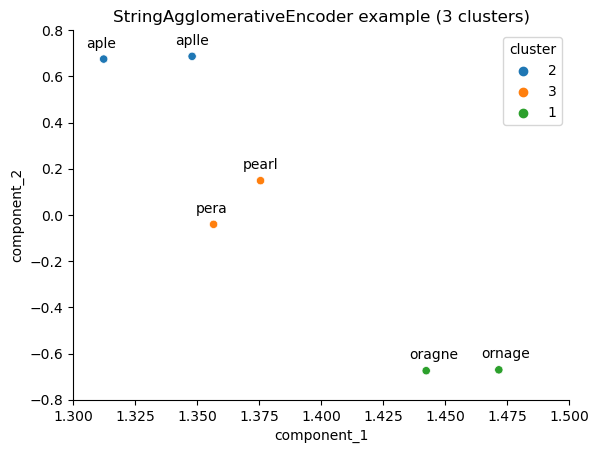

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

def label_point(data, ax):
    for i, data in data.iterrows():
        ax.text(data["component_1"]-.007, data["component_2"]+.05,
                str(data["dirty_category"]))

sns.scatterplot(x="component_1", y="component_2", hue="cluster", data=data)
plt.xlim((1.3, 1.5))
plt.ylim((-.8, .8))
label_point(data, plt.gca())
plt.gca().spines[['right', 'top']].set_visible(False)
plt.title("StringAgglomerativeEncoder example (3 clusters)")
plt.savefig("agglomerating_categories.png", dpi=400)
plt.show()